In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
def make_simple_plot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [4]:
df = pd.read_csv("D:\Machine Learning/religion.csv")
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


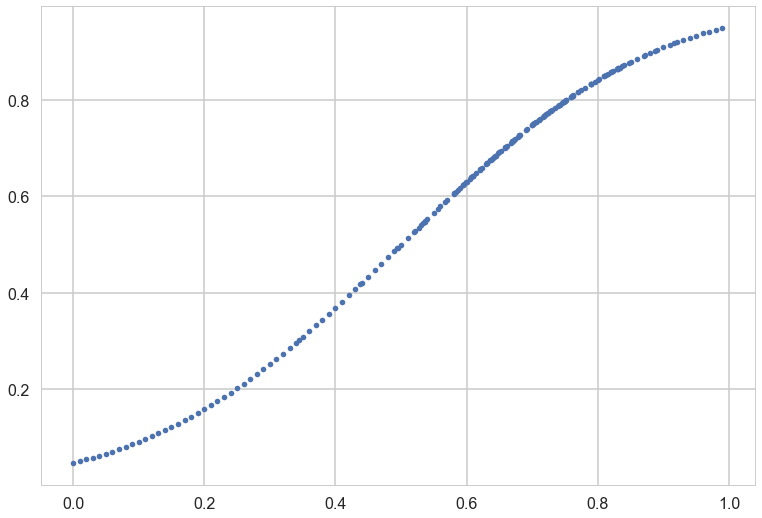

In [5]:
x=df.rfrac.values
f=df.promney.values
plt.plot(x,f,'.')

Now, in real life we are only given a sample of points. Lets assume that out of this population of 200 points we are given a sample $\cal{D}$ of 30 data points. Such data is called **in-sample data**. Contrastingly, the entire population of data points is also called **out-of-sample** data.

In [6]:
#allindexes=np.sort(np.random.choice(x.shape[0], size=100, replace=False))
indexes=np.sort(np.random.choice(x.shape[0], size=30, replace=False))
indexes

array([  3,  10,  22,  51,  61,  65,  80,  82,  83,  88,  92,  97, 101,
       105, 117, 123, 124, 127, 129, 130, 136, 144, 152, 154, 161, 165,
       174, 184, 185, 199], dtype=int64)

In [7]:
x

array([ 0.        ,  0.01      ,  0.02      ,  0.03      ,  0.04      ,
        0.05      ,  0.06      ,  0.07      ,  0.08      ,  0.09      ,
        0.1       ,  0.11      ,  0.12      ,  0.13      ,  0.14      ,
        0.15      ,  0.16      ,  0.17      ,  0.18      ,  0.19      ,
        0.2       ,  0.21      ,  0.22      ,  0.23      ,  0.24      ,
        0.25      ,  0.26      ,  0.27      ,  0.28      ,  0.29      ,
        0.3       ,  0.31      ,  0.32      ,  0.33      ,  0.34      ,
        0.34471571,  0.35      ,  0.36      ,  0.37      ,  0.38      ,
        0.39      ,  0.4       ,  0.41      ,  0.42      ,  0.43      ,
        0.43754875,  0.44      ,  0.45      ,  0.46      ,  0.47      ,
        0.48      ,  0.49      ,  0.49457783,  0.49504505,  0.5       ,
        0.51      ,  0.52      ,  0.52125572,  0.52660826,  0.53      ,
        0.53376832,  0.53596824,  0.53659523,  0.54      ,  0.55      ,
        0.55576823,  0.56      ,  0.56696266,  0.57      ,  0.58

In [8]:
samplex = x[indexes]
samplef = f[indexes]

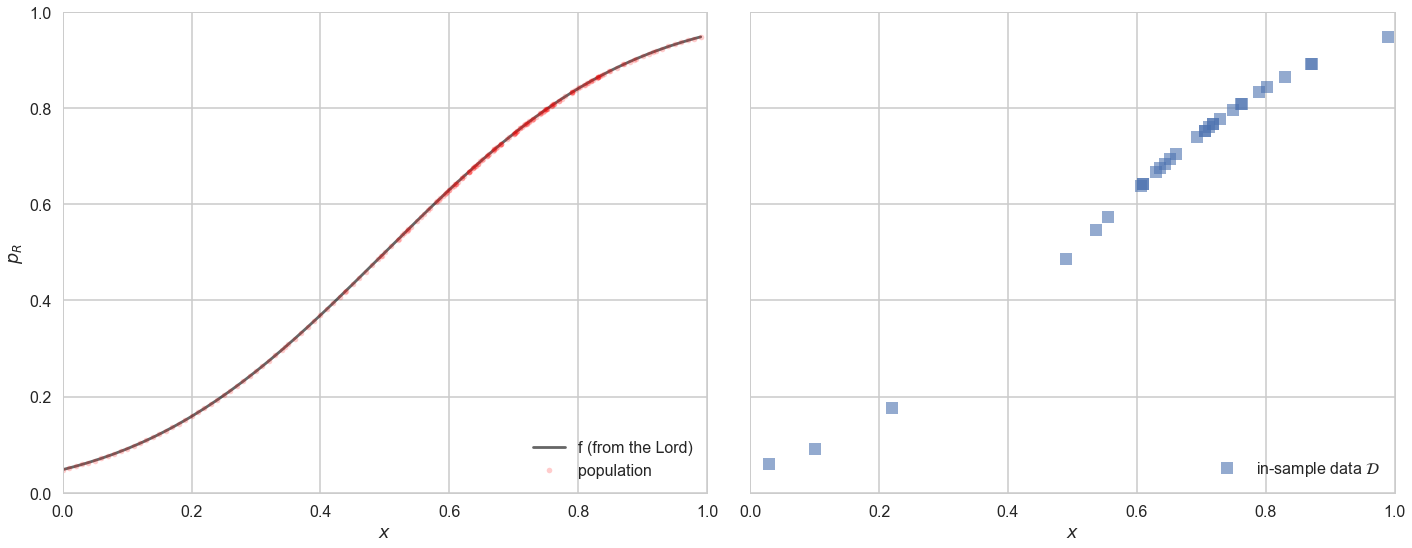

In [9]:
axes=make_plot()
axes[0].plot(x,f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(x,f, 'r.', alpha=0.2, label="population");
axes[1].plot(samplex,samplef, 's', alpha=0.6, label="in-sample data $\cal{D}$");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

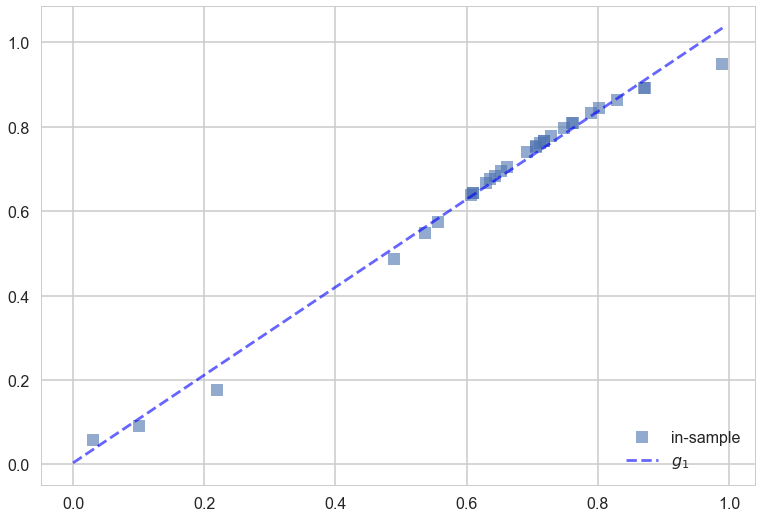

In [10]:
g1 = np.poly1d(np.polyfit(x[indexes],f[indexes],1))                              # g1 is the best firt straight line
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g1(x), 'b--', alpha=0.6, label="$g_1$");
plt.legend(loc=4);

In [11]:
g20 = np.poly1d(np.polyfit(x[indexes],f[indexes],20))

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


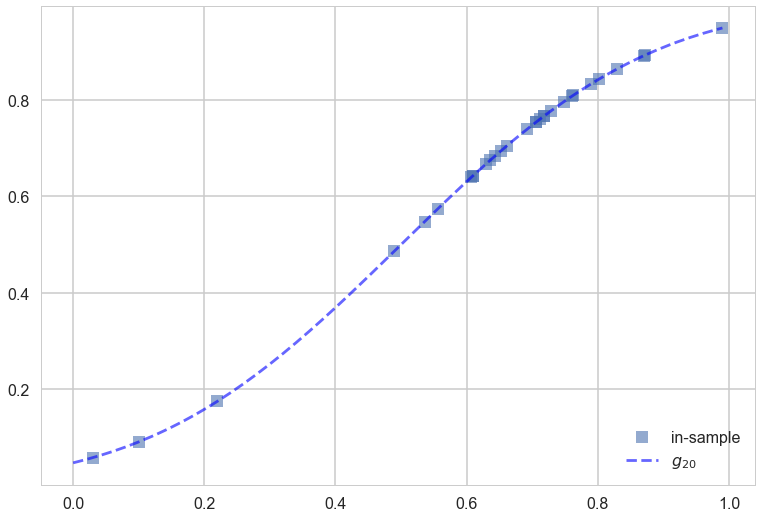

In [12]:
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g20(x), 'b--', alpha=0.6, label="$g_{20}$");
plt.legend(loc=4);

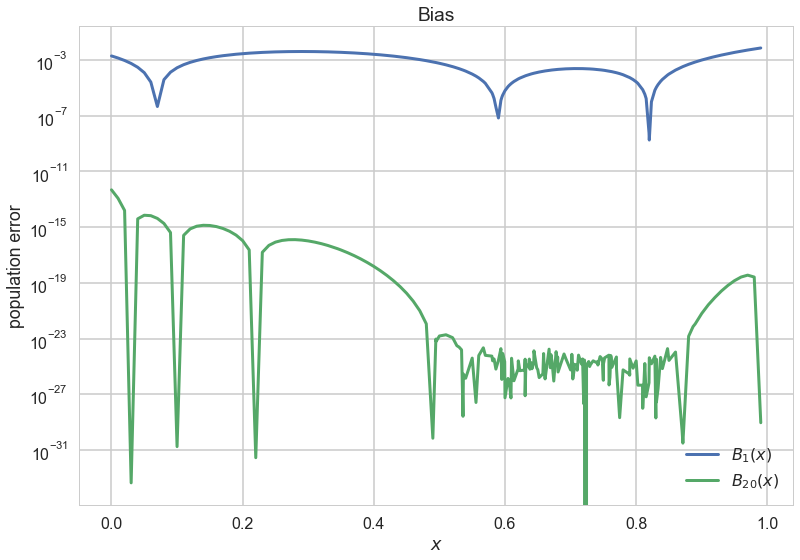

In [13]:
plt.plot(x, (g1(x)-f)**2, lw=3, label="$B_1(x)$")
plt.plot(x, (g20(x)-f)**2, lw=3,label="$B_{20}(x)$");
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Bias");

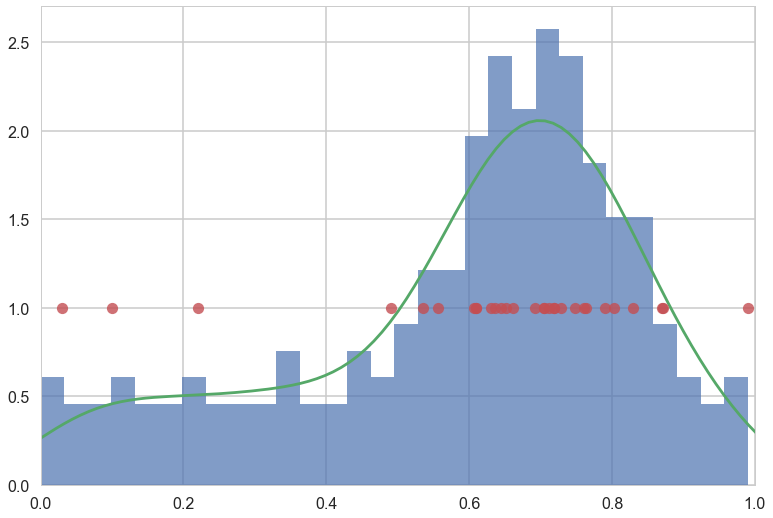

In [14]:
plt.hist(x, normed=True, bins=30, alpha=0.7)
sns.kdeplot(x)
plt.plot(x[indexes], [1.0]*len(indexes),'o', alpha=0.8)
plt.xlim([0,1]);

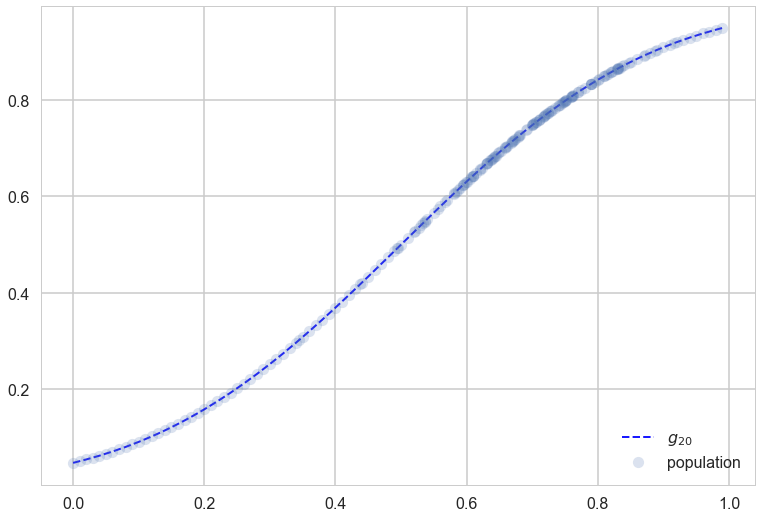

In [15]:
#plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g20(x), 'b--', alpha=0.9, lw=2, label="$g_{20}$");
plt.plot(x,f, 'o', alpha=0.2, label="population");
plt.legend(loc=4);

In [16]:
sigma=0.06
mask=(x > 0.65) & (x < 0.8)
sigmalist=sigma+mask*0.03

In [17]:
y = f + sp.stats.norm.rvs(scale=sigmalist, size=200)
#the next three lines just ensure that y remains a probability
yadd = (y < 0.0) *(0.01-y)
ysub = (y > 1.0)*(y - 1.0)
y = y + yadd -ysub

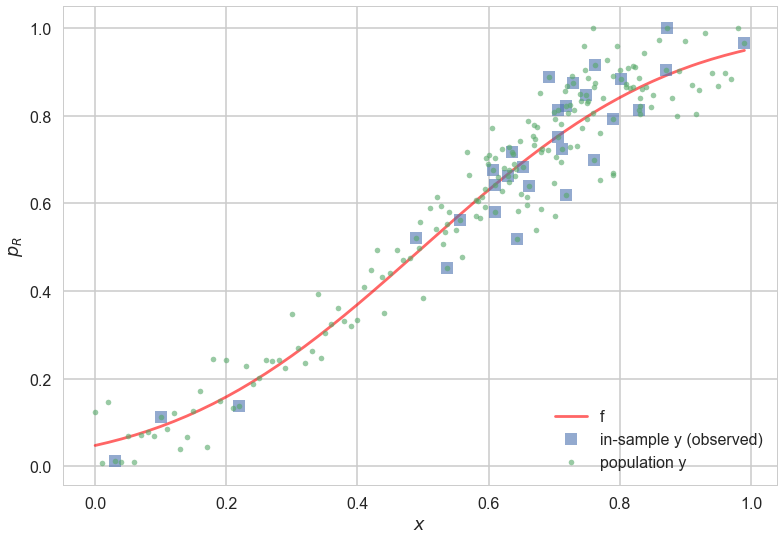

In [18]:
plt.plot(x,f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes], y[indexes], 's', alpha=0.6, label="in-sample y (observed)");
plt.plot(x, y, '.', alpha=0.6, label="population y");
plt.xlabel('$x$');
plt.ylabel('$p_R$')
plt.legend(loc=4);

In the figure above, one can see the scatter of the $y$ population about the curve of $f$. The errors of the 30 observation points ("in-sample") are shown as squares. One can see that observations next to each other can now be fairly different, as we descibed above.

In [19]:
g1noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],1))
g20noisy = np.poly1d(np.polyfit(x[indexes],y[indexes],20))

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


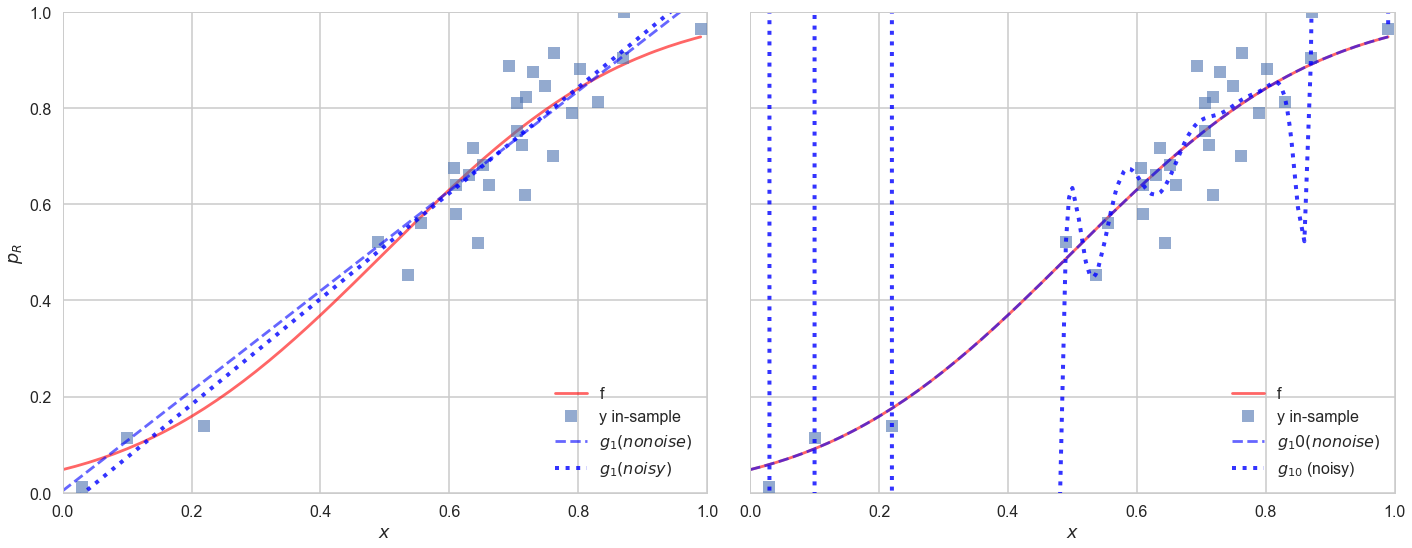

In [20]:
axes=make_plot()
axes[0].plot(x, f, 'r-', alpha=0.6, label="f");
axes[1].plot(x, f, 'r-', alpha=0.6, label="f");
axes[0].plot(x[indexes], y[indexes], 's', alpha=0.6, label="y in-sample");
axes[1].plot(x[indexes], y[indexes], 's', alpha=0.6, label="y in-sample");
axes[0].plot(x,g1(x),  'b--', alpha=0.6, label="$g_1 (no noise)$");
axes[0].plot(x,g1noisy(x), 'b:', lw=4, alpha=0.8, label="$g_1 (noisy)$");
axes[1].plot(x,g20(x),  'b--', alpha=0.6, label="$g_10 (no noise)$");
axes[1].plot(x,g20noisy(x), 'b:', lw=4, alpha=0.8, label="$g_{10}$ (noisy)");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

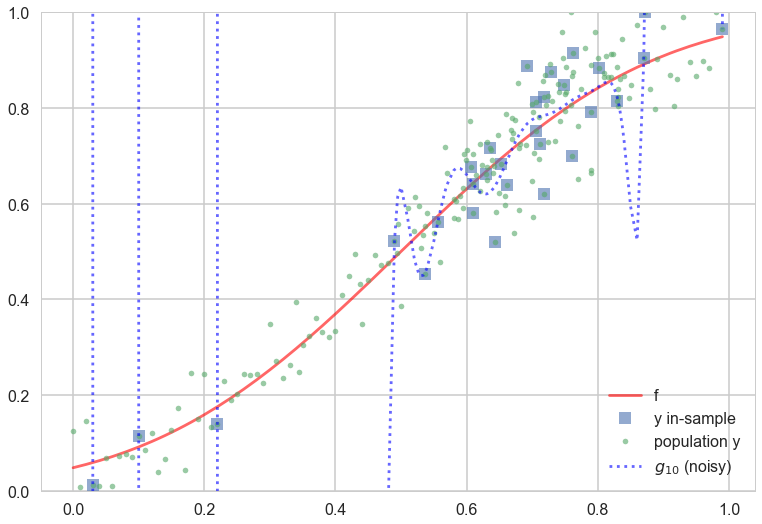

In [21]:
plt.plot(x,f, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample");
plt.plot(x,y,  '.', alpha=0.6, label="population y");
plt.plot(x,g20noisy(x), 'b:', alpha=0.6, label="$g_{10}$ (noisy)");
plt.ylim([0,1])
plt.legend(loc=4);

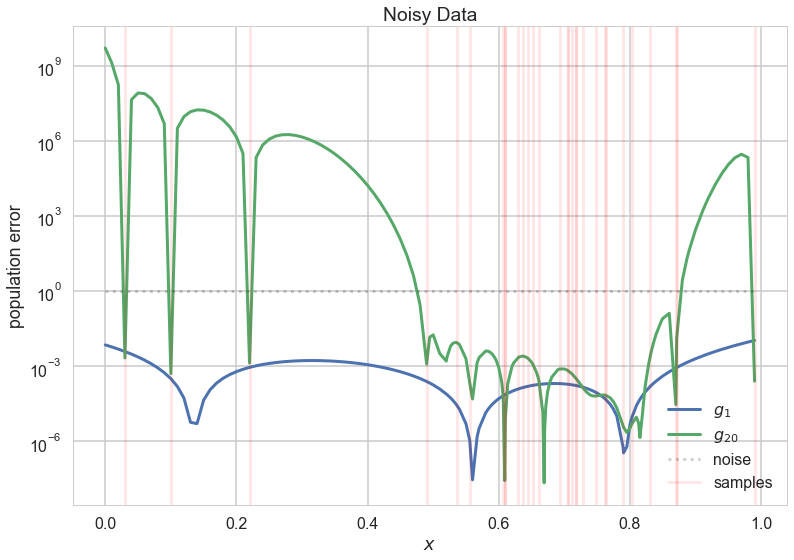

In [22]:
plt.plot(x, ((g1noisy(x)-f)**2), lw=3, label="$g_1$")
plt.plot(x, ((g20noisy(x)-f)**2), lw=3,label="$g_{20}$");
plt.plot(x, [1]*x.shape[0], "k:", label="noise", alpha=0.2);
for i in indexes[:-1]:
    plt.axvline(x[i], 0, 1, color='r', alpha=0.1)
plt.axvline(x[indexes[-1]], 0, 1, color='r', alpha=0.1, label="samples")
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Noisy Data");

$g_1$ now, for the most part, has a lower error! So you'd be better off by having chosen a set of models with much more bias (the straight lines, $\cal{H}_1$) than a more complex model set ($\cal{H}_{20}$) in the case of noisy data.

In [23]:
def gen(degree, nsims, size, x, out):
    outpoly=[]
    for i in range(nsims):
        indexes=np.sort(np.random.choice(x.shape[0], size=size, replace=False))
        pc=np.polyfit(x[indexes], out[indexes], degree)
        p=np.poly1d(pc)
        outpoly.append(p)
    return outpoly

In [24]:
polys1 = gen(1, 200, 30, x, y);
polys20 = gen(20, 200, 30, x, y);

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\NIHIT\Anaconda2\lib\sit

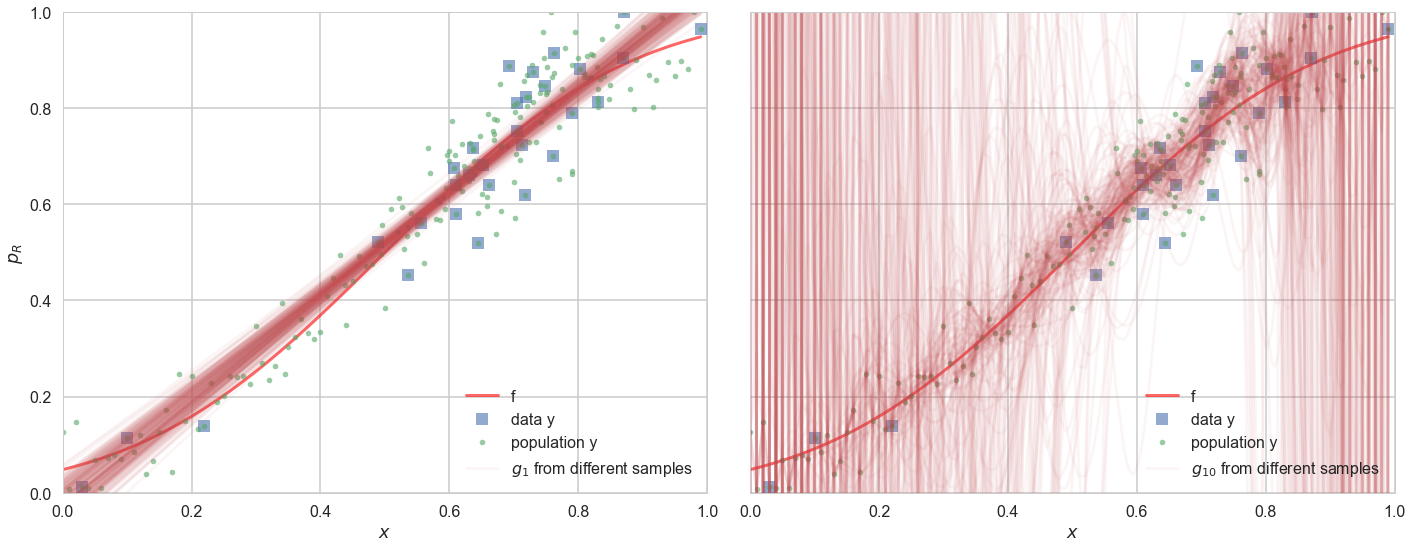

In [25]:
axes=make_plot()
axes[0].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[1].plot(x,f, 'r-', lw=3, alpha=0.6, label="f");
axes[0].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[1].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y");
axes[0].plot(x, y, '.', alpha=0.6, label="population y");
axes[1].plot(x, y, '.', alpha=0.6, label="population y");
c=sns.color_palette()[2]
for i,p in enumerate(polys1[:-1]):
    axes[0].plot(x,p(x), alpha=0.05, c=c)
axes[0].plot(x,polys1[-1](x), alpha=0.05, c=c,label="$g_1$ from different samples")
for i,p in enumerate(polys20[:-1]):
    axes[1].plot(x,p(x), alpha=0.05, c=c)
axes[1].plot(x,polys20[-1](x), alpha=0.05, c=c, label="$g_{10}$ from different samples")
axes[0].legend(loc=4);
axes[1].legend(loc=4);

C:\Users\NIHIT\Anaconda2\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


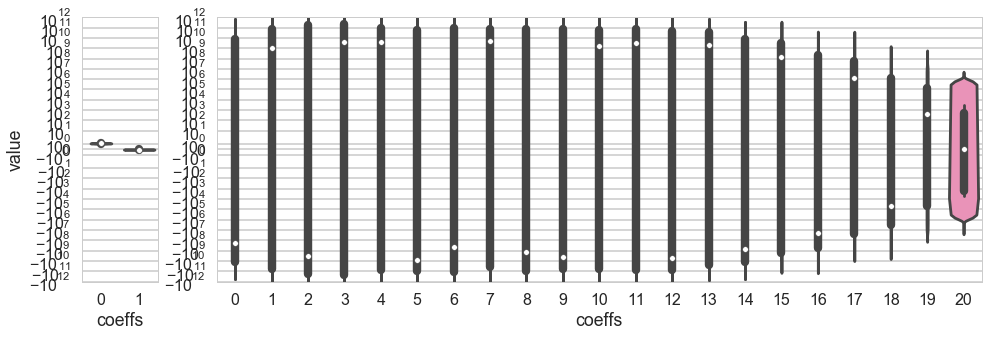

In [26]:
pdict1 = {}
pdict20 = {}
for i in reversed(range(2)):
    pdict1[i]=[]
    for j, p in enumerate(polys1):
        pdict1[i].append(p.c[i])
for i in reversed(range(21)):
    pdict20[i]=[]
    for j, p in enumerate(polys20):
        pdict20[i].append(p.c[i]) 
df1=pd.DataFrame(pdict1)
df20=pd.DataFrame(pdict20)
fig = plt.figure(figsize=(14, 5)) 
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 10]) 
axes = [plt.subplot(gs[0]), plt.subplot(gs[1])]
axes[0].set_ylabel("value")
axes[0].set_xlabel("coeffs")
axes[1].set_xlabel("coeffs")
plt.tight_layout();
sns.violinplot(df1, ax=axes[0]);
sns.violinplot(df20, ax=axes[1]);
axes[0].set_yscale("symlog");
axes[1].set_yscale("symlog");
axes[0].set_ylim([-1e12, 1e12]);
axes[1].set_ylim([-1e12, 1e12]);

The variance can be seen in a different way by plotting the coefficients of the polynomial fit. Above we plot the coefficients of the fit in $\cal{H}_1$. The variance is barely 0.2 about the mean for both co-efficients.

In the right panel we plot the coefficients of the fit in $\cal{H}_{20}$. This is why we use the word "variance": the spread in the values of the middle coefficients about their means (dashed lines) is of the order $10^{10}$ (the vertical height of the bulges), with huge outliers!! The 20th order polynomial fits are a disaster!

# Testing and Training sets

1. The **training set**, which is the part of the data we use to fit a model
2. The **testing set**, a smaller part of the data set which we use to see how good our fit was.

In [27]:
df=pd.DataFrame(dict(x=x[indexes],f=f[indexes],y=y[indexes]))

In [28]:
df.head()

,f,x,y
0,0.058596,0.030000,0.012217
1,0.091211,0.100000,0.113767
2,0.175324,0.220000,0.138746
3,0.486704,0.490000,0.521772
4,0.547716,0.535968,0.453239


In [29]:
from sklearn.cross_validation import train_test_split
datasize=df.shape[0]
#split dataset using the index, as we have x,f, and y that we want to split.
itrain,itest = train_test_split(range(30), train_size=24, test_size=6)
xtrain= df.x[itrain].values
ftrain = df.f[itrain].values
ytrain = df.y[itrain].values
xtest= df.x[itest].values
ftest = df.f[itest].values
ytest = df.y[itest].values

C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


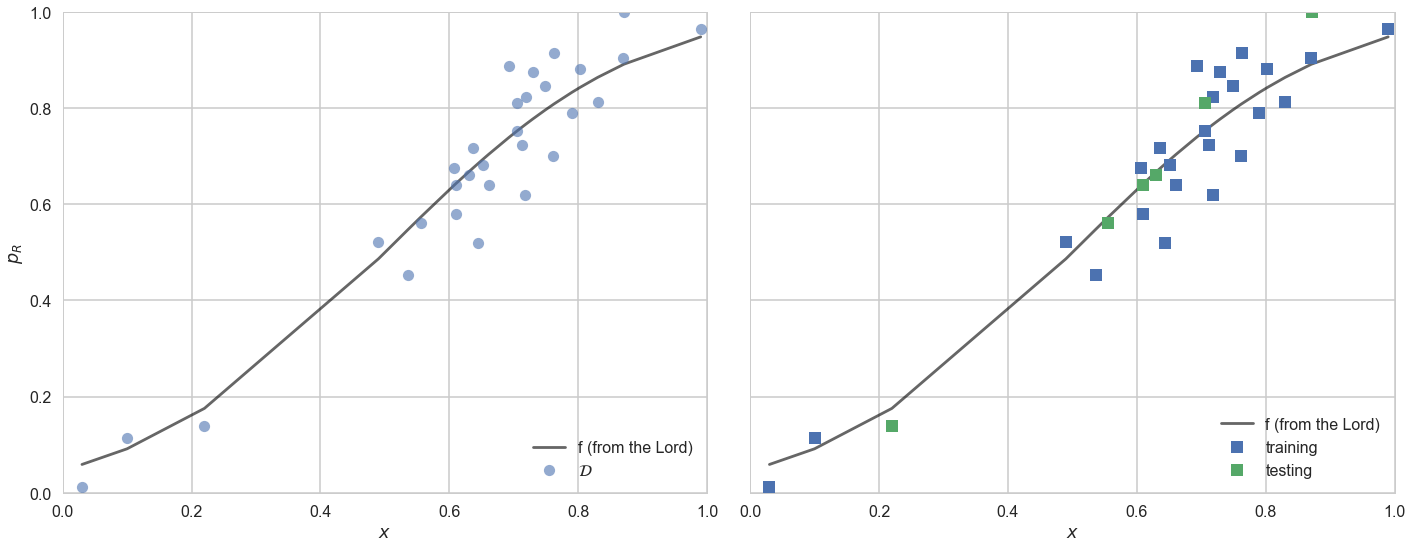

In [30]:
axes=make_plot()
axes[0].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(df.x,df.y, 'o',alpha=0.6, label="$\cal{D}$");
axes[1].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[1].plot(xtrain, ytrain, 's', label="training")
axes[1].plot(xtest, ytest, 's', label="testing")
axes[0].legend(loc="lower right")
axes[1].legend(loc="lower right")

**Scikit-learn** is the main python machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as train_test_split. It can be used in python by the incantation **import sklearn**.

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: **an estimator interface for building and ﬁtting models, a predictor interface for making predictions and a transformer interface for converting data. The estimator interface is at the core of the library**. It deﬁnes instantiation mechanisms of objects and exposes a fit method for learning a model from training data. All supervised and unsupervised learning algorithms (e.g., for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like **feature extraction, feature selection or dimensionality reduction are also provided as estimators**.

Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a transformer interface which deﬁnes a transform method. It takes as input some new data X and yields as output a transformed version of X. **Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library**.

Here is an example. The reason for using [[1],[2],[3]] as opposed to [1,2,3] is that **scikit-learn** expects data to be stored in a **two-dimensional array** or matrix with size [n_samples, n_features].

In [31]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(3).fit_transform([[1],[2], [3]])

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.]])

To transform [1,2,3] into [[1],[2],[3]] we need to do a reshape.

In [32]:
np.array([1,2,3]).reshape(-1,1)

array([[1],
       [2],
       [3]])

In [33]:
xtrain

array([ 0.80255796,  0.66111803,  0.53596824,  0.76128927,  0.69278797,
        0.790102  ,  0.71829603,  0.71210742,  0.70520676,  0.49      ,
        0.64396137,  0.03      ,  0.83      ,  0.7290476 ,  0.60994296,
        0.1       ,  0.60677057,  0.74865483,  0.76288888,  0.65210195,
        0.63633949,  0.7181319 ,  0.99      ,  0.87      ])

In [34]:
xtrain.reshape(-1, 1)

array([[ 0.80255796],
       [ 0.66111803],
       [ 0.53596824],
       [ 0.76128927],
       [ 0.69278797],
       [ 0.790102  ],
       [ 0.71829603],
       [ 0.71210742],
       [ 0.70520676],
       [ 0.49      ],
       [ 0.64396137],
       [ 0.03      ],
       [ 0.83      ],
       [ 0.7290476 ],
       [ 0.60994296],
       [ 0.1       ],
       [ 0.60677057],
       [ 0.74865483],
       [ 0.76288888],
       [ 0.65210195],
       [ 0.63633949],
       [ 0.7181319 ],
       [ 0.99      ],
       [ 0.87      ]])

In [35]:
PolynomialFeatures(2).fit_transform(xtrain.reshape(-1,1))

array([[  1.00000000e+00,   8.02557963e-01,   6.44099283e-01],
       [  1.00000000e+00,   6.61118033e-01,   4.37077053e-01],
       [  1.00000000e+00,   5.35968243e-01,   2.87261957e-01],
       [  1.00000000e+00,   7.61289271e-01,   5.79561355e-01],
       [  1.00000000e+00,   6.92787968e-01,   4.79955168e-01],
       [  1.00000000e+00,   7.90102000e-01,   6.24261170e-01],
       [  1.00000000e+00,   7.18296032e-01,   5.15949190e-01],
       [  1.00000000e+00,   7.12107418e-01,   5.07096975e-01],
       [  1.00000000e+00,   7.05206764e-01,   4.97316580e-01],
       [  1.00000000e+00,   4.90000000e-01,   2.40100000e-01],
       [  1.00000000e+00,   6.43961374e-01,   4.14686251e-01],
       [  1.00000000e+00,   3.00000000e-02,   9.00000000e-04],
       [  1.00000000e+00,   8.30000000e-01,   6.88900000e-01],
       [  1.00000000e+00,   7.29047604e-01,   5.31510409e-01],
       [  1.00000000e+00,   6.09942964e-01,   3.72030419e-01],
       [  1.00000000e+00,   1.00000000e-01,   1.0000000

Lets put this alltogether. Below we create multiple datasets, one for each polynomial degree:

In [36]:
def make_features(train_set, test_set, degrees):
    traintestlist=[]
    for d in degrees:
        traintestdict={}
        traintestdict['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1,1))
        traintestdict['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1,1))
        traintestlist.append(traintestdict)
    return traintestlist

# How do training and testing error change with complexity?

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees=range(21)
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))

traintestlists=make_features(xtrain, xtest, degrees)

# The structure of scikit-learn

Let's see the structure of scikit-learn needed to make these fits. .fit always takes two arguments:

estimator.fit(Xtrain, ytrain).

Here Xtrain must be in the form of an array of arrays, with the inner array each corresponding to one sample, and whose elements correspond to the feature values for that sample. (This means that the 4th element for each of these arrays, in our polynomial example, corresponds to the valueof $x^3$ for each "sample" $x$). The ytrain is a simple array of responses..continuous for regression problems, and categorical values or 1-0's for classification problems.

In [39]:
traintestlists[3]['train'], ytrain

(array([[  1.00000000e+00,   8.02557963e-01,   6.44099283e-01,
           5.16927009e-01],
        [  1.00000000e+00,   6.61118033e-01,   4.37077053e-01,
           2.88959522e-01],
        [  1.00000000e+00,   5.35968243e-01,   2.87261957e-01,
           1.53963286e-01],
        [  1.00000000e+00,   7.61289271e-01,   5.79561355e-01,
           4.41213842e-01],
        [  1.00000000e+00,   6.92787968e-01,   4.79955168e-01,
           3.32507166e-01],
        [  1.00000000e+00,   7.90102000e-01,   6.24261170e-01,
           4.93229999e-01],
        [  1.00000000e+00,   7.18296032e-01,   5.15949190e-01,
           3.70604256e-01],
        [  1.00000000e+00,   7.12107418e-01,   5.07096975e-01,
           3.61107518e-01],
        [  1.00000000e+00,   7.05206764e-01,   4.97316580e-01,
           3.50711016e-01],
        [  1.00000000e+00,   4.90000000e-01,   2.40100000e-01,
           1.17649000e-01],
        [  1.00000000e+00,   6.43961374e-01,   4.14686251e-01,
           2.67041928e-01],

The test set Xtest has the same structure, and is used in the .predict interface. Once we have fit the estimator, we predict the results on the test set by:

estimator.predict(Xtest).

The results of this are a simple array of predictions, of the same form and shape as ytest.

In [40]:
traintestlists[3]['test'], ytest

(array([[ 1.        ,  0.55576823,  0.30887832,  0.17166476],
        [ 1.        ,  0.63      ,  0.3969    ,  0.250047  ],
        [ 1.        ,  0.70533267,  0.49749418,  0.3508989 ],
        [ 1.        ,  0.22      ,  0.0484    ,  0.010648  ],
        [ 1.        ,  0.87121681,  0.75901872,  0.66126987],
        [ 1.        ,  0.61      ,  0.3721    ,  0.226981  ]]),
 array([ 0.5611377 ,  0.66219133,  0.81196134,  0.13874644,  1.        ,
         0.64100781]))

We can then use **mean_squared_error** from sklearn to calculate the error between the predictions and actual ytest values. Below we calculate this error on both the training set (which we already fit on) and the test set (which we hadnt seen before), and plot how these errors change with the degree of the polynomial.

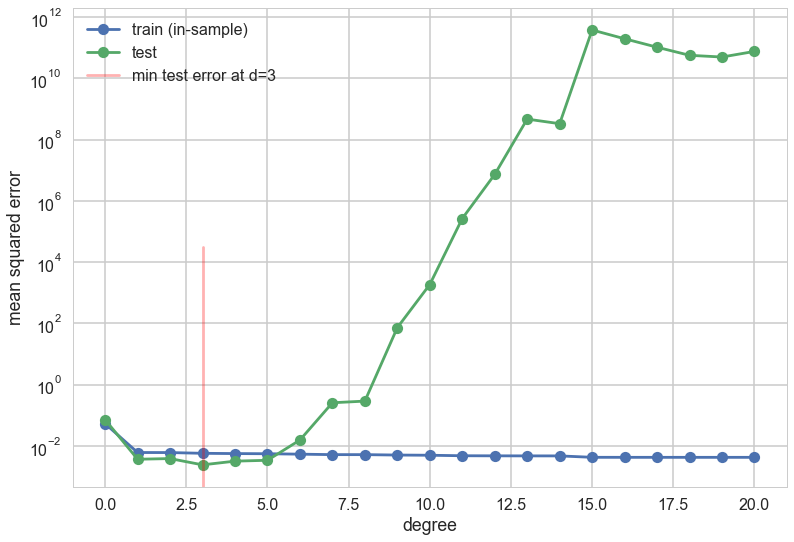

In [41]:
for d in degrees:#for increasing polynomial degrees 0,1,2...
    Xtrain = traintestlists[d]['train']
    Xtest = traintestlists[d]['test']
    #set up model
    est = LinearRegression()
    #fit
    est.fit(Xtrain, ytrain)
    #predict
    prediction_on_training = est.predict(Xtrain)
    prediction_on_test = est.predict(Xtest)
    #calculate mean squared error
    error_train[d] = mean_squared_error(ytrain, prediction_on_training)
    error_test[d] = mean_squared_error(ytest, prediction_on_test)

plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_test, marker='o', label='test')
plt.axvline(np.argmin(error_test), 0,0.5, color='r', label="min test error at d=%d"%np.argmin(error_test), alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

1


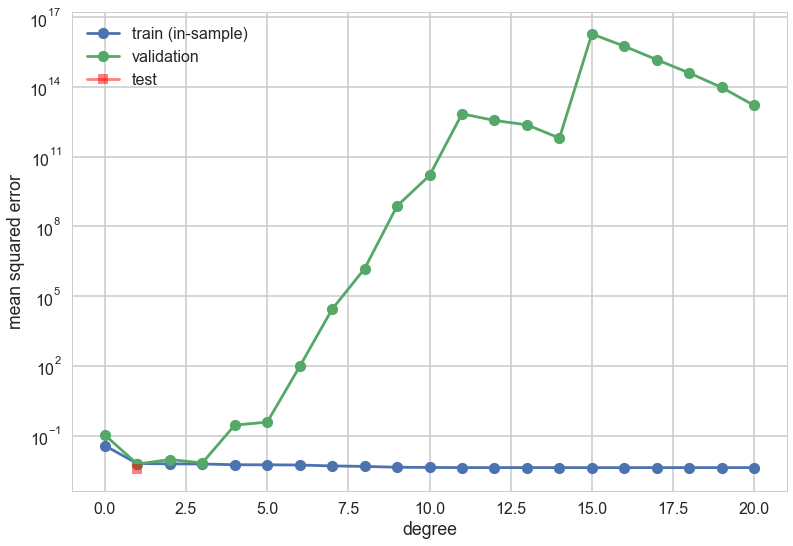

In [42]:
#we split the training set down further
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    #fit a model linear in polynomial coefficients on the new smaller training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    #predict on new training and validation sets and calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

#calculate the degree at which validation error is minimized
mindeg = np.argmin(error_valid) 
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
#predict on the test set now and calculate error
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
print mindeg

5


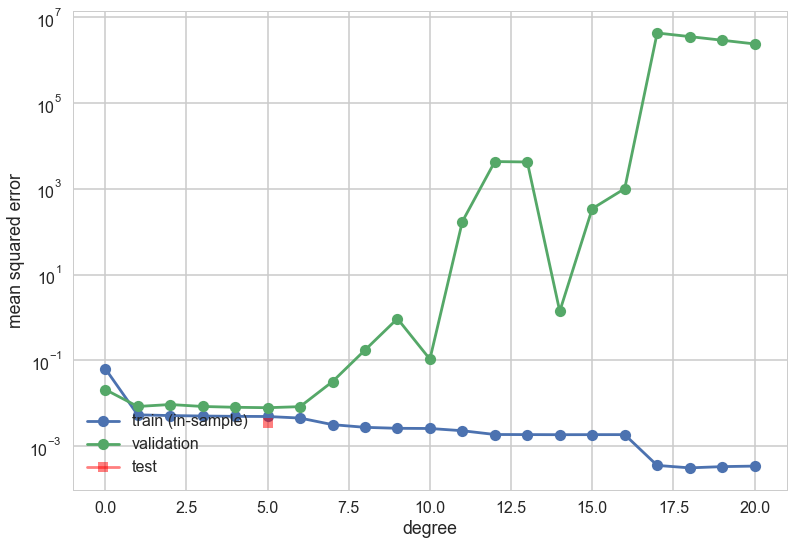

In [43]:
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    #fit a model linear in polynomial coefficients on the training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    #calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

mindeg = np.argmin(error_valid)
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')

plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='lower left')
plt.yscale("log")
print mindeg

# The entire description of K-fold Cross-validation

We put thogether this scheme to calculate the error for a given polynomial degree $d$ with the method we used earlier to choose a model given the validation-set risk as a function of $d$:

1. create n_folds partitions of the training data.
2. We then train on n_folds -1 of these partitions, and test on the remaining partition. There are n_folds such combinations of partitions (or folds), and thus we obtain n_fold risks.
3. We average the error or risk of all such combinations to obtain, for each value of $d$, $R_{dCV}$.
4. We move on to the next value of $d$, and repeat 3
5. and then find the optimal value of d that minimizes risk $d=*$.
6. We finally use that value to make the final fit in $\cal{H}_*$ on the entire old training set.

It can also shown that cross-validation error is an unbiased estimate of the out of sample-error

In [44]:
from sklearn.cross_validation import KFold
n_folds=4
degrees=range(21)
results=[]
for d in degrees:
    hypothesisresults=[]
    for train, test in KFold(24, n_folds): # split data into train/test groups, 4 times
        tvlist=make_features(xtrain[train], xtrain[test], degrees)
        clf = LinearRegression()
        clf.fit(tvlist[d]['train'], ytrain[train]) # fit
        hypothesisresults.append(mean_squared_error(ytrain[test], clf.predict(tvlist[d]['test'])))
        # evaluate score function on held-out data
    results.append((np.mean(hypothesisresults), np.min(hypothesisresults), np.max(hypothesisresults))) # average

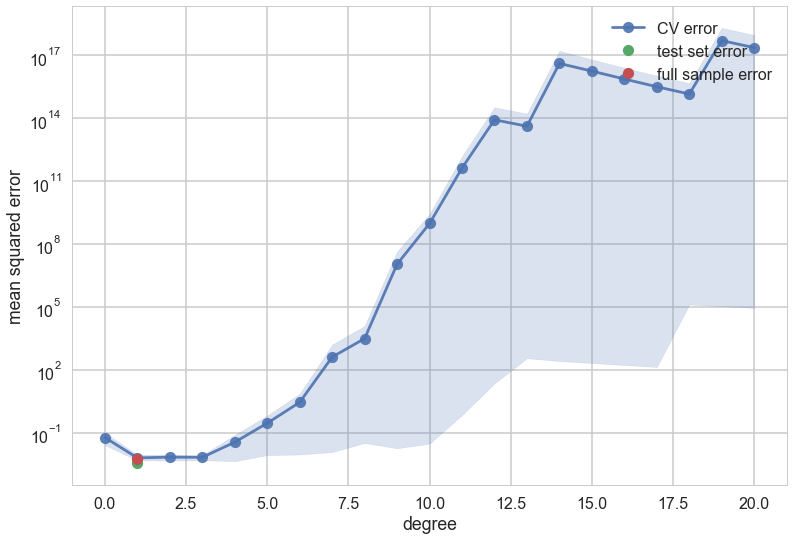

In [45]:
mindeg = np.argmin([r[0] for r in results])
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(pred, ytest)
errtr=mean_squared_error(ytrain, clf.predict(ttlist[mindeg]['train']))
errout=0.8*errtr+0.2*err
c0=sns.color_palette()[0]
#plt.errorbar(degrees, [r[0] for r in results], yerr=[r[1] for r in results], marker='o', label='CV error', alpha=0.5)
plt.plot(degrees, [r[0] for r in results], marker='o', label='CV error', alpha=0.9)
plt.fill_between(degrees, [r[1] for r in results], [r[2] for r in results], color=c0, alpha=0.2)
plt.plot([mindeg], [err], 'o',  label='test set error')
plt.plot([mindeg], [errout], 'o',  label='full sample error')


plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

We see that the cross-validation error minimizes at a low degree, and then increases. Because we have so few data points the spread in fold errors increases as well.

# $Regularization$

Let us now ask a different question: if we are going to fit the data with an expressive model such as 20th order polynomials, how can we regularize or smooth or restrict the choices of the kinds of 20th order polynomials that we allow in our fits. In other words, we are again trying to bring down the complexity of the hypothesis space, but by a different tack: a tack which prefers smooth polynomials over wiggly ones.

$$\cal{R}(h_j) =  \sum_{y_i \in \cal{D}} (y_i - h_j(x_i))^2 +\alpha \sum_{i=0}^j a_i^2.$$

Notice that we are adding a term to the training error, once $\alpha$ is defined. The entire structure is similar to what we did to find the optimal $d=*$, with $\alpha$ being the analog of $d$. And thus we can use the same validation and cross-validation technology that we developed to estimate $d$.

This technique is called **regularization or shrinkage** as it takes the coefficients $a_i$ towards smaller sizes. As you have seen earlier, for polynomials this corresponds to choosing smooth functions over wiggly functions. When $\alpha=0$ we have the regular polynomial regression problem, and if we are using 20th order polynomials we will wildly overfit. We are in the high variance zone. The problem with a non-zero $\alpha$ is called ridge regression. As $\alpha$ increases, the importance of the penalty term increases at the expense of the ERM term, and we are pushed to increase the smoothness of the polynomials. When $\alpha$ becomes very large the penalty term dominates and we get into the high bias zone. Thus $\alpha$ acts as a complexity parameter just like $d$ did, with high complexity being $\alpha \to 0$.

Let us illustrate the concept of regularization using the example of the sine wave. This time we shall consider fits using the straight lines in $\cal{H}_1$. Once again we fit a straight line to 3 points, choosing 100 such set of 3 points from the data set.

(100L, 3L)


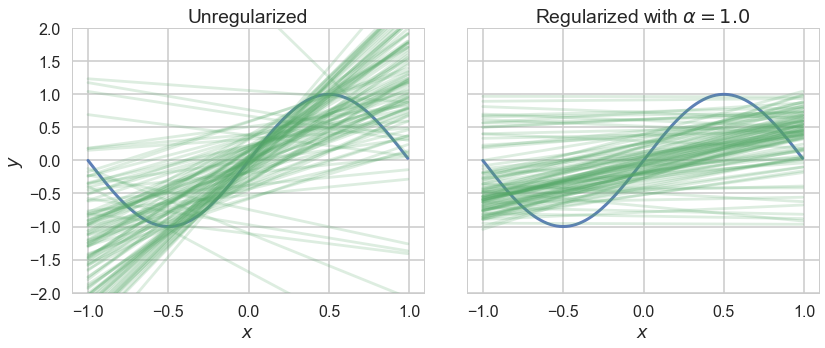

In [46]:
xs=np.arange(-1.,1.,0.01)
ff = lambda x: np.sin(np.pi*x)
ffxs=ff(xs)
from sklearn.linear_model import Ridge
axes=make_simple_plot()
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
axes[0].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
axes[1].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
from sklearn.linear_model import Ridge
D=np.empty((100,3), dtype="int")
print D.shape
for i in range(100):
    D[i,:] = np.random.choice(200, replace=False, size=3)
for i in range(100):
    choices = D[i,:]
    p1=np.polyfit(xs[choices], ffxs[choices],1)
    est = Ridge(alpha=1.0)
    est.fit(xs[choices].reshape(-1,1), ffxs[choices])
    axes[0].plot(xs, np.polyval(p1, xs), color=c1, alpha=0.2)
    axes[1].plot(xs, est.predict(xs.reshape(-1,1)), color=c1, alpha=0.2)
axes[0].set_title("Unregularized");
axes[1].set_title("Regularized with $\\alpha=1.0$");

In the left panel we plot unregularized straight line fits. The plot is hairy, since choosing 3 points from 200 between -1 and 1 dosent constrain the lines much at all. On the right panel, we plot the output of **Ridge** regression with $\alpha=1$. This corresponds to adding a term to the empirical risk of $\alpha\, (a_0^2 + a_1^2)$ where $a_0$ and $a_1$ are the intercept and slope of the line respectively. Notice that the lines are much more constrained in this second plot. The penalty term has regularized the values of the intercept and slope, and forced the intercept to be closer to 0 and the lines to be flatter.

# Regularization of the Romney model with Cross-Validation

In [47]:
def plot_functions(est, ax, df, alpha, xtest, Xtest, xtrain, ytrain):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label="training", alpha=0.4)
    ax.plot(xtest, ytest, 's', label="testing", alpha=0.6)
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(20).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX),  '.', label="alpha = %s" % str(alpha))
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')
    
def plot_coefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.semilogy(np.abs(coef), marker='o', label="alpha = %s" % str(alpha))
    ax.set_ylim((1e-1, 1e15))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')

Lets see what some of the $\alpha$s do. The diagram below trains on the entire training set, for given values of $\alpha$, minimizing the penalty-term-added training error.

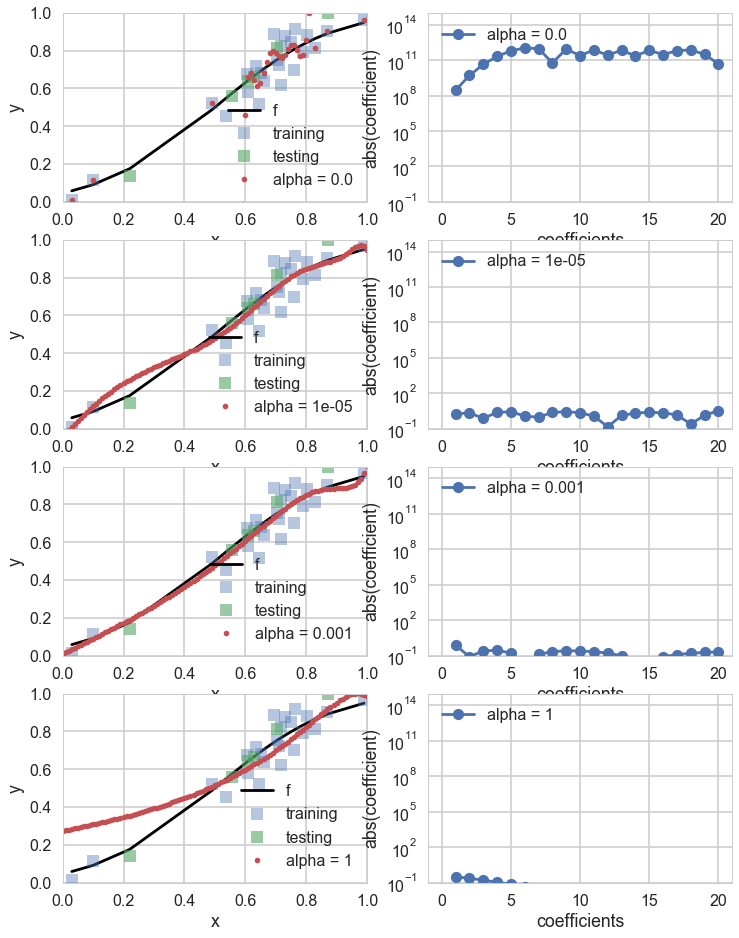

In [48]:
fig, rows = plt.subplots(4, 2, figsize=(12, 16))
d=20
alphas = [0.0, 1e-5, 1e-3, 1]
Xtrain = traintestlists[d]['train']
Xtest = traintestlists[d]['test']
for i, alpha in enumerate(alphas):
    l,r=rows[i]
    est = Ridge(alpha=alpha)
    est.fit(Xtrain, ytrain)
    plot_functions(est, l, df, alpha, xtest, Xtest, xtrain, ytrain )
    plot_coefficients(est, r, alpha)

As you can see, as we increase $\alpha$ from 0 to 1, we start out overfitting, then doing well, and then, our fits, develop a mind of their own irrespective of data, as the penalty term dominates the risk

Lets use cross-validation to figure what this critical $\alpha_*$ is. To do this we use the concept of a meta-estimator from scikit-learn. As the API paper puts it:

*In scikit-learn, model selection is supported in two distinct meta-estimators, GridSearchCV and RandomizedSearchCV. They take as input an estimator (basic or composite), whose hyper-parameters must be optimized, and a set of hyperparameter settings to search through.*

The concept of a meta-estimator allows us to wrap, for example, cross-validation, or methods that build and combine simpler models or schemes. For example:

clf = Ridge()

parameters = {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0]}

gridclassifier=GridSearchCV(clf, param_grid=parameters, cv=4, scoring="mean_squared_error")

The **GridSearchCV** replaces the manual iteration over thefolds using KFolds and the averaging we did previously, doing it all for us. It takes a parameter grid in the shape of a dictionary as input, and sets $\alpha$ to the appropriate parameter values one by one. It then trains the model, cross-validation fashion, and gets the error. Finally it compares the errors for the different $\alpha$'s, and picks the best choice model.

In [49]:
from sklearn.metrics import make_scorer
#, 1e-6, 1e-5, 1e-3, 1.0
from sklearn.grid_search import GridSearchCV
def cv_optimize_ridge(X, y, n_folds=4):
    clf = Ridge()
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0]}
    #the scoring parameter below is the default one in ridge, but you can use a different one
    #in the cross-validation phase if you want.
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="mean_squared_error")
    gs.fit(X, y)
    return gs

C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [50]:
fitmodel = cv_optimize_ridge(Xtrain, ytrain, n_folds=4)

C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\NIHIT\Anaconda2\lib\site-pa

In [51]:
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

(Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 {'alpha': 0.1},
 -0.008402403785102201,
 [mean: -11.01639, std: 18.67812, params: {'alpha': 1e-08},
  mean: -11.41415, std: 19.74528, params: {'alpha': 1e-06},
  mean: -0.43240, std: 0.73073, params: {'alpha': 1e-05},
  mean: -0.08822, std: 0.13711, params: {'alpha': 5e-05},
  mean: -0.22290, std: 0.37178, params: {'alpha': 0.0001},
  mean: -0.25732, std: 0.43383, params: {'alpha': 0.0005},
  mean: -0.18875, std: 0.31555, params: {'alpha': 0.001},
  mean: -0.04873, std: 0.07370, params: {'alpha': 0.01},
  mean: -0.00840, std: 0.00222, params: {'alpha': 0.1},
  mean: -0.01962, std: 0.00752, params: {'alpha': 1.0}])

In [52]:
alphawechoose = fitmodel.best_params_['alpha']
clf = Ridge(alpha=alphawechoose).fit(Xtrain,ytrain)

In [53]:
err=mean_squared_error(clf.predict(Xtest), ytest)
errtr=mean_squared_error(clf.predict(Xtrain), ytrain)
errout=0.8*errtr+0.2*err

In [54]:
def plot_functions_onall(est, ax, df, alpha, xtrain, ytrain, Xtrain, xtest, ytest):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', alpha=0.4, label="train")
    ax.plot(xtest, ytest, 's', alpha=0.6, label="test")
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(20).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX), '.', alpha=0.6, label="alpha = %s" % str(alpha))
    #print est.predict(transX)
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')

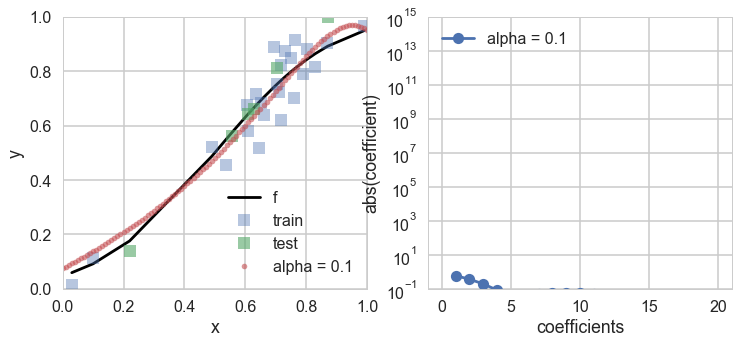

In [55]:
fig, rows = plt.subplots(1, 2, figsize=(12, 5))
l,r=rows
plot_functions_onall(clf, l, df, alphawechoose, xtrain, ytrain, Xtrain, xtest, ytest)
plot_coefficients(clf, r, alphawechoose)

# What is minimized where?

Regularization adds a term to the error or risk, which is then, for fixed $\alpha$, minimized on the training set. The validation error is then calculated on the validation set and reported alongside the value of $\alpha$ used. If we cross-validate, then the validation error is an average over multiple folds.

On the other hand, when we validate for $d$, we use the validation error as an estimate of the out-of-sample error and use this estimate to directly pick the best model (best $d$).

One can think of regularization as an estimation of the overfit term while validation directly estimates $R_{out}$